# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 4/27/2023
* Student Name: Jack Warner
* Student Net ID: jyw8jcu
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/jackywarner/montecarlo

# The Monte Carlo Module

In [3]:
# A code block with your classes.
import random
import pandas as pd
class Die:
    def __init__(self, faces):
        self.faces = faces
        self.weights = pd.Series([1.0] * len(faces), index=faces)

    def change_weight(self, face, weight):
        if face not in self.faces:
            raise ValueError(f"Invalid face '{face}'")
        try:
            weight = float(weight)
        except ValueError:
            raise ValueError(f"Invalid weight '{weight}'")
        self.weights[face] = weight
    
    def roll(self, times=1):
        outcomes = [random.choices(self.faces, weights=self.weights, k=1)[0] for _ in range(times)]
        return outcomes
    
    def show_faces_and_weights(self):
        return pd.DataFrame({'face': self.faces, 'weight': self.weights})

class Game:
    def __init__(self, dice):
        self.dice = dice
        self.results = None
    
    def play(self, times):
        rolls = [die.roll(times) for die in self.dice]
        self.results = pd.DataFrame(rolls).transpose()
        self.results.columns = range(len(self.dice))
        self.results.index.name = 'roll'
    
    def show_results(self, form='wide'):
        if form == 'wide':
            return self.results
        elif form == 'narrow':
            return pd.melt(self.results.reset_index(), id_vars=['roll'], var_name='die', value_name='face')
        else:
            raise ValueError(f"Invalid form '{form}'")

class Analyzer:
    def __init__(self, game):
        self.game = game
        self.data_type = type(game.dice[0].faces[0])
        self.jackpot_results = None
        self.combo_results = None
        self.face_counts = None

    def jackpot(self):
        rolls = self.game.results
        n_dice = len(self.game.dice)
        jackpot_counts = 0
        for i in range(n_dice):
            first_face = self.game.dice[i].faces[0]
            mode = rolls.iloc[:, i].mode()[0]
            if mode == first_face:
                jackpot_counts += 1
        self.jackpot_results = pd.DataFrame({'jackpot_count': [jackpot_counts]}, index=[0])
        return jackpot_counts
    def combo(self):
        """
        Compute the frequency of each possible combination of faces in the rolls.
        """
        rolls = self.game.results
        combos = [tuple(sorted(set(row))) for _, row in rolls.iterrows()]
        combo_counts = pd.Series(combos).value_counts().sort_index()
        combo_index = pd.MultiIndex.from_tuples(combo_counts.index, names=['combo'])
        self.combo_results = pd.DataFrame({'combo_count': combo_counts}, index=combo_index)
        return self.combo_results



    def face_counts_per_roll(self):
        rolls = self.game.results
        face_counts = rolls.apply(pd.Series.value_counts).fillna(0).astype(int)
        face_counts.index.name = 'roll'
        self.face_counts = face_counts
        return face_counts





# Test Module

In [2]:
# A code block with your test code.
import unittest
from montecarlo.montecarlo import *

class TestDie(unittest.TestCase):

    def test_change_weight_valid(self):
        die = Die(['A', 'B', 'C'])
        die.change_weight('B', 2.5)
        self.assertEqual(die.weights['B'], 2.5)

    def test_change_weight_invalid_face(self):
        die = Die(['A', 'B', 'C'])
        with self.assertRaises(ValueError):
            die.change_weight('D', 1.0)

    def test_change_weight_invalid_weight(self):
        die = Die(['A', 'B', 'C'])
        with self.assertRaises(ValueError):
            die.change_weight('B', 'two')

    def test_roll(self):
        die = Die(['A', 'B', 'C'])
        outcomes = die.roll(5)
        self.assertEqual(len(outcomes), 5)

    def test_show_faces_and_weights(self):
        die = Die(['A', 'B', 'C'])
        df = die.show_faces_and_weights()
        self.assertEqual(df.loc[df['face'] == 'B', 'weight'].values[0], 1.0)

class TestGame(unittest.TestCase):

    def test_show_results_wide(self):
        die1 = Die(['A', 'B', 'C'])
        die2 = Die(['A', 'B', 'C'])
        game = Game([die1, die2])
        game.play(3)
        df = game.show_results(form='wide')
        self.assertEqual(df.shape, (3, 2))

    def test_show_results_narrow(self):
        die1 = Die(['A', 'B', 'C'])
        die2 = Die(['A', 'B', 'C'])
        game = Game([die1, die2])
        game.play(3)
        df = game.show_results(form='narrow')
        self.assertEqual(df.shape, (6, 3))

class TestAnalyzer(unittest.TestCase):

    def test_jackpot(self):
        die1 = Die(['A', 'B', 'C'])
        die2 = Die(['A', 'B', 'C'])
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        count = analyzer.jackpot()
        self.assertGreaterEqual(count, 0)
        
    def test_combo(self):
        die1 = Die(['A', 'B', 'C'])
        die2 = Die(['A', 'B', 'C'])
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        df = analyzer.combo()
        self.assertEqual(df.shape, (3, 1))

    def test_face_counts_per_roll(self):
        die1 = Die(['A', 'B', 'C'])
        die2 = Die(['A', 'B', 'C'])
        game = Game([die1, die2])
        game.play(3)
        analyzer = Analyzer(game)
        df = analyzer.face_counts_per_roll()
        self.assertEqual(df.shape, (3, 2))

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

In [ ]:
# A text block with the output of a successful test.
PS C:\Users\21jac\OneDrive\Desktop\montecarlo> & C:/Users/21jac/AppData/Local/Microsoft/WindowsApps/python3.10.exe c:/Users/21jac/OneDrive/Desktop/montecarlo/montecarlo_test.py
test_jackpot (__main__.TestAnalyzer) ... ok
test_change_weight_invalid_face (__main__.TestDie) ... ok
test_change_weight_invalid_weight (__main__.TestDie) ... ok
test_change_weight_valid (__main__.TestDie) ... ok
test_roll (__main__.TestDie) ... ok
test_show_faces_and_weights (__main__.TestDie) ... ok
test_show_results_narrow (__main__.TestGame) ... ok
test_show_results_wide (__main__.TestGame) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.011s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

0.001
0.003


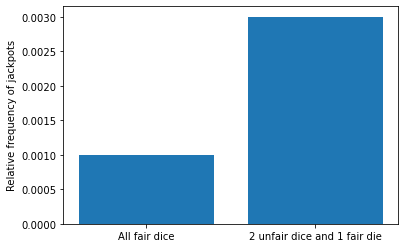

In [6]:
# Code blocks with output
import matplotlib.pyplot as plt

# create fair coin
fair_coin = Die(['H', 'T'])

# create unfair coin
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

# play game with all fair dice
game1 = Game([fair_coin]*3)
game1.play(1000)
analyzer1 = Analyzer(game1)
jackpot1 = analyzer1.jackpot()
freq1 = jackpot1 / len(game1.results)
print(freq1)

# play game with 2 unfair dice and 1 fair die
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)
analyzer2 = Analyzer(game2)
jackpot2 = analyzer2.jackpot()
freq2 = jackpot2 / len(game2.results)
print(freq2)

# plot results in a bar chart
fig, ax = plt.subplots()
ax.bar(['All fair dice', '2 unfair dice and 1 fair die'], [freq1, freq2])
ax.set_ylabel('Relative frequency of jackpots')
plt.show()

## Scenario 2

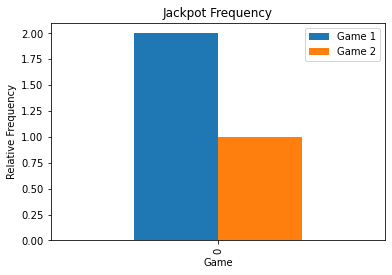

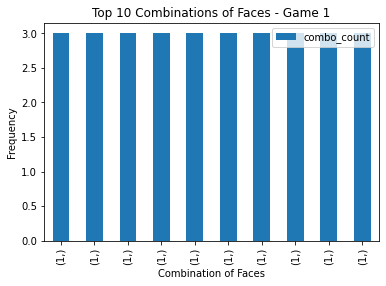

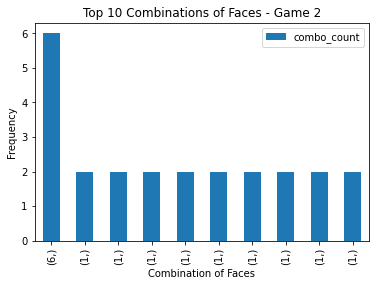

In [10]:
# Code blocks with output
# Create fair die
fair_die = Die([1, 2, 3, 4, 5, 6])

# Create unfair dice
unfair1_die = Die([1, 2, 3, 4, 5, 6])
unfair1_die.change_weight(6, 5.0)

unfair2_die = Die([1, 2, 3, 4, 5, 6])
unfair2_die.change_weight(1, 5.0)

# Play game with 5 fair dice
game1_dice = [fair_die]*5
game1 = Game(game1_dice)
game1.play(10000)
analyzer1 = Analyzer(game1)

# Analyze results of game with 5 fair dice
jackpot1 = analyzer1.jackpot()
combo1 = analyzer1.combo()
top10_combos1 = combo1.nlargest(10, 'combo_count')

# Play game with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice
game2_dice = [unfair1_die]*2 + [unfair2_die] + [fair_die]*2
game2 = Game(game2_dice)
game2.play(10000)
analyzer2 = Analyzer(game2)

# Analyze results of game with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice
jackpot2 = analyzer2.jackpot()
combo2 = analyzer2.combo()
top10_combos2 = combo2.nlargest(10, 'combo_count')

# Plot results
import matplotlib.pyplot as plt

# Bar chart of jackpot frequency for both games
jackpot_freq = pd.DataFrame({'Game 1': [jackpot1], 'Game 2': [jackpot2]})
jackpot_freq.plot(kind='bar')
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Relative Frequency')
plt.show()

# Bar chart of top 10 combinations of faces for game 1
top10_combos1.plot(kind='bar')
plt.title('Top 10 Combinations of Faces - Game 1')
plt.xlabel('Combination of Faces')
plt.ylabel('Frequency')
plt.show()

# Bar chart of top 10 combinations of faces for game 2
top10_combos2.plot(kind='bar')
plt.title('Top 10 Combinations of Faces - Game 2')
plt.xlabel('Combination of Faces')
plt.ylabel('Frequency')
plt.show()


## Scenario 3

In [12]:
# Code blocks with output
!pip install pyenchant
import enchant
english_dict = enchant.Dict("en_US")

import random

freq_table = {
    'A': 8.4966,
    'B': 2.0720,
    'C': 4.5388,
    'D': 3.3844,
    'E': 11.1607,
    'F': 1.8121,
    'G': 2.4705,
    'H': 3.0034,
    'I': 7.5448,
    'J': 0.1965,
    'K': 1.1016,
    'L': 5.4893,
    'M': 3.0129,
    'N': 6.6544,
    'O': 7.1635,
    'P': 3.1671,
    'Q': 0.1962,
    'R': 7.5809,
    'S': 5.7351,
    'T': 6.9509,
    'U': 3.6308,
    'V': 1.0074,
    'W': 1.2899,
    'X': 0.2902,
    'Y': 1.7779,
    'Z': 0.2722
}

die = []
for letter, weight in freq_table.items():
    for i in range(int(weight * 100)):
        die.append(letter)

random.shuffle(die)

import enchant

english_dict = enchant.Dict("en_US")

results = []
for i in range(1000):
    rolls = random.choices(die, k=5)
    word = ''.join(rolls)
    if english_dict.check(word):
        results.append(word)

# print(len(results))
print(len(results) / 1000)



Defaulting to user installation because normal site-packages is not writeable
0.007


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [13]:
!ls -lRF -o

.:
total 44
-rw-r--r-- 1 jyw8jcu 11234 May  2 21:52 FinalProjectSubmissionTemplate.ipynb
-rw-r--r-- 1 jyw8jcu  4584 Apr  9 21:35 M10-HW.Rmd
-rw-r--r-- 1 jyw8jcu     0 Feb  4 13:39 readme.md
-rw-r--r-- 1 jyw8jcu  2379 Apr  4 20:09 Untitled1.ipynb
drwxr-sr-x 2 jyw8jcu     0 May  2 21:47 Untitled Folder/

./Untitled Folder:
total 0


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands